# Trader Simulation in Mesa

I will attempt to build an identical model to mine in the Mesa framework. 

## Collision simulation
First I will attempt to build the collision simulation

### Initialising packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as constant
from scipy.optimize import curve_fit
import random
import math
import scipy.stats as stats
from tqdm.notebook import tqdm, trange
import ipywidgets as widgets
import mesa
import pandas as pd
from matplotlib.patches import Circle
import seaborn as sns



# Testing 2D Collision Geometry

In [2]:
# Printing the input information
incident_velocity1 = [1,0]
incident_velocity2 = [-1,0]
contact_angle = 89
mass1 = 1
mass2 = 1

def rotation_of_axes(vector2D, angle_of_rotation):
    vectorx = vector2D[0]
    vectory = vector2D[1]
    rotated_vector = [vectorx*np.cos(angle_of_rotation) + vectory*np.sin(angle_of_rotation), -vectorx*np.sin(angle_of_rotation) + vectory*np.cos(angle_of_rotation)]
    return rotated_vector

def movement_angle(vector):
    velocity = vector
    principal_vector = [np.sign(velocity[0]),0]
    return math.degrees(np.arccos(np.dot(principal_vector,velocity)/(np.linalg.norm(principal_vector)*np.linalg.norm(velocity))))

def Collision_1D(velocity1,velocity2,mass1,mass2):
    velocity1_after = ((mass1 - mass2)*velocity1 + 2*mass2*velocity2)/(mass1+mass2)
    velocity2_after = ((mass2 - mass1)*velocity2 + 2*mass1*velocity1)/(mass1+mass2)
    return velocity1_after, velocity2_after


In [230]:
def collision_full(velocity1, velocity2, contact_angle, mass1,mass2):
    contact_angle = math.radians(contact_angle)
    incident_velocity1 = velocity1
    incident_velocity2 = velocity2
    # Rotating the vectors into the axis with x parallel to the contact angle
    rotated_velocity1 = rotation_of_axes(incident_velocity1,contact_angle)
    rotated_velocity2 = rotation_of_axes(incident_velocity2,contact_angle)
    # print(f'rotated velocity1: {rotated_velocity1}, rotated velocity2: {rotated_velocity2}')

    # Calculating collision dynamics
    post_collision_rotated_velocity1 = [0,0]
    post_collision_rotated_velocity2 = [0,0]
    post_collision_rotated_velocity1[0], post_collision_rotated_velocity2[0] = Collision_1D(rotated_velocity1[0],rotated_velocity2[0],mass1,mass2)
    post_collision_rotated_velocity1[1], post_collision_rotated_velocity2[1] = rotated_velocity1[1], rotated_velocity2[1]
    # print(f'Post collision rotated velocity1: {post_collision_rotated_velocity1}, velocity2: {post_collision_rotated_velocity2}')

    # Rotating vectors back into original axes
    final_velocity1 = rotation_of_axes(post_collision_rotated_velocity1,-contact_angle)
    final_velocity2 = rotation_of_axes(post_collision_rotated_velocity2,-contact_angle)
    # print(f'Final Velocities of particles in original axes, velocity1: {final_velocity1}, velocity2: {final_velocity2}')

    total_momentum = sum(final_velocity1*mass1+final_velocity2*mass2)
    velocities = []
    velocities.append(final_velocity1)
    velocities.append(final_velocity2)
    return velocities

''' Doesn't work '''

def collision_vector(velocity1,velocity2,contact_angle, mass1, mass2):
    self_velocity = velocity1
    other_velocity = velocity2
    radius = 1
    self_pos = [0,0]
    other_pos = np.array(rotation_of_axes([radius,0],contact_angle))
    print(self_velocity,other_velocity, self_pos, other_pos)
    self_velocity = self_velocity - (2*mass2/(mass1+mass2))*np.dot(self_velocity - other_velocity,self_pos-other_pos)*(self_pos-other_pos)/np.linalg.norm(self_pos-other_pos)**2
    other_velocity = other_velocity - (2*mass1/(mass1+mass2))*np.dot(other_velocity - self_velocity,other_pos-self_pos)*(other_pos-self_pos)/np.linalg.norm(other_pos-self_pos)**2
    return self_velocity, other_velocity

In [243]:
v1 = np.array([1,0])
v2 = np.array([-1,0])
contact_angle = 30
mass1 = mass2 = 1
# print(f'Collision standard: {collision_full(v1,v2,contact_angle,mass1,mass2)}, Collision vector: {collision_vector(v1,v2,contact_angle,mass1,mass2)}')
print(collision_full(v1,v2,contact_angle,mass1,mass2))
print(collision_full(v1,v2,-contact_angle,mass1,mass2))

[[-0.5000000000000002, -0.8660254037844386], [0.5000000000000002, 0.8660254037844386]]
[[-0.5000000000000002, 0.8660254037844386], [0.5000000000000002, -0.8660254037844386]]


## Timing the efficiency of different methods

In [4]:
%%timeit -r 4 -n 1000

# velocity = [1.414,0]
# rotation_angle = -45
# print(movement_angle(velocity))
# print(f'Rotated vector: {rotation_of_axes(velocity,math.radians(rotation_angle))}, direction {movement_angle(rotation_of_axes(velocity,math.radians(rotation_angle)))}')


# print(f'incident_velocity1: {incident_velocity1}, incident_velocity2: {incident_velocity2}, contact_angle: {contact_angle}')

# Rotating the vectors into the axis with x parallel to the contact angle
rotated_velocity1 = rotation_of_axes(incident_velocity1,contact_angle)
rotated_velocity2 = rotation_of_axes(incident_velocity2,contact_angle)
# print(f'rotated velocity1: {rotated_velocity1}, rotated velocity2: {rotated_velocity2}')

# Calculating collision dynamics
post_collision_rotated_velocity1 = [0,0]
post_collision_rotated_velocity2 = [0,0]
post_collision_rotated_velocity1[0], post_collision_rotated_velocity2[0] = Collision_1D(rotated_velocity1[0],rotated_velocity2[0],mass1,mass2)
post_collision_rotated_velocity1[1], post_collision_rotated_velocity2[1] = rotated_velocity1[1], rotated_velocity2[1]
# print(f'Post collision rotated velocity1: {post_collision_rotated_velocity1}, velocity2: {post_collision_rotated_velocity2}')

# Rotating vectors back into original axes
final_velocity1 = rotation_of_axes(post_collision_rotated_velocity1,-contact_angle)
final_velocity2 = rotation_of_axes(post_collision_rotated_velocity2,-contact_angle)
# print(f'Final Velocities of particles in original axes, velocity1: {final_velocity1}, velocity2: {final_velocity2}')

total_momentum = sum(final_velocity1+final_velocity2)
# print(total_momentum)


30.7 µs ± 5.57 µs per loop (mean ± std. dev. of 4 runs, 1,000 loops each)


In [5]:
%%timeit -r 4 -n 1000

# Comparing to full combined formula
final_velocity1 = [0,0]
final_velocity2 = [0,0]

final_velocity1[0] = (np.linalg.norm(incident_velocity1)*np.cos(movement_angle(incident_velocity1)-contact_angle)*(mass1-mass2)+2*mass2*np.linalg.norm(incident_velocity2)*np.cos(movement_angle(incident_velocity2)-contact_angle))*np.cos(contact_angle)/(mass1+mass2)+np.linalg.norm(incident_velocity1)*np.sin(contact_angle-movement_angle(incident_velocity1))*np.cos(contact_angle)
final_velocity1[1] = (np.linalg.norm(incident_velocity1)*np.cos(movement_angle(incident_velocity1)-contact_angle)*(mass1-mass2)+2*mass2*np.linalg.norm(incident_velocity2)*np.cos(movement_angle(incident_velocity2)-contact_angle))*np.sin(contact_angle)/(mass1+mass2)+np.linalg.norm(incident_velocity1)*np.sin(contact_angle-movement_angle(incident_velocity1))*np.sin(contact_angle)


final_velocity2[0] = (np.linalg.norm(incident_velocity2)*np.cos(movement_angle(incident_velocity2)-contact_angle)*(mass2-mass1)+2*mass1*np.linalg.norm(incident_velocity1)*np.cos(movement_angle(incident_velocity1)-contact_angle))*np.cos(contact_angle)/(mass2+mass1)+np.linalg.norm(incident_velocity2)*np.sin(movement_angle(incident_velocity2)-contact_angle)*np.cos(contact_angle+np.pi/2)
final_velocity2[1] = (np.linalg.norm(incident_velocity2)*np.cos(movement_angle(incident_velocity2)-contact_angle)*(mass2-mass1)+2*mass1*np.linalg.norm(incident_velocity1)*np.cos(movement_angle(incident_velocity1)-contact_angle))*np.sin(contact_angle)/(mass2+mass1)+np.linalg.norm(incident_velocity2)*np.sin(movement_angle(incident_velocity2)-contact_angle)*np.sin(contact_angle+np.pi/2)
        
# print(f'Final Velocities of particles in original axes, velocity1: {final_velocity1}, velocity2: {final_velocity2}')


346 µs ± 46.2 µs per loop (mean ± std. dev. of 4 runs, 1,000 loops each)


In [6]:
vector = [random.uniform(-10,10),random.uniform(-10,10)]/np.linalg.norm([random.uniform(-10,10),random.uniform(-10,10)])
vector = rotation_of_axes([1,0],random.uniform(0,2*np.pi))
print(vector)
print(np.linalg.norm(vector))

[-0.6017111556721583, 0.7987137692187832]
1.0


In [7]:
velocities = [1,1]
velocity = [0,0]

# Pseudo 2D Simulation


In [8]:
class Trader(mesa.Agent):
    def __init__(self, unique_id, model, velocities = [1,1], m = 1, dimensions = 2, commodities = 1,commodity_value = 1):
        
        super().__init__(unique_id, model)
        self.dimensions = dimensions
        self._mass = m
        assert len(velocities) <= dimensions, 'Too few dimensions for provided input velocity array'

        self._velocity = self.rotation_of_axes(velocities,self.random.uniform(0,2*np.pi))
        
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
        
        # Error handling
        assert dimensions > 0 and type(dimensions) == int, 'Must have positive integer dimensions'
        assert type(m) == int or type(m) == float, 'Mass must be numeric'
        
        self.commodities = commodities
        # self.cash = np.linalg.norm(self._velocity)
        self.pessimism_optimism = self.random.uniform(-0.5, 0.5)
        self._commodity_value = commodity_value*(1+self.pessimism_optimism)        
        # Valuation strategy for transactions
        self.valuation_strategy = self.random.choice(["follower","1 week average", "2 week average","random"]) # "follower"
        
    @property
    def commodity_value(self):
        if self.valuation_strategy == "random":
            self._commodity_value = self.model.commodity_value[-1]
        elif self.valuation_strategy == "1 week average":
            self._commodity_value = np.mean(self.model.commodity_value[-7:])
        elif self.valuation_strategy == "2 week average":
            self._commodity_value = np.mean(self.model.commodity_value[-14:])
        elif self.valuation_strategy == "follower":
            agents = self.model.schedule.agents
            # max_assets = max(agent.net_assets for agent in agents)
            max_agent = max(agents, key=lambda x: x.net_assets)
            self._commodity_value = max_agent._commodity_value
#             max_assets = 0
#             max_assets_agent = self.model.schedule.agents[0]
#             for agent in self.model.schedule.agents:
#                 print(f'net assets: {agent.net_assets} v current max assets {max_assets}')
#                 if agent.net_assets > max_assets:
#                     max_assets = agent.net_assets 
#                     max_assets_agent = agent
            
#             self._commodity_value = max_assets_agent._commodity_value
        else:
            self._commodity_value = self.model.commodity_value[-1]
        
        # Adding in individual pessimism and optimism factor for each agent
        self._commodity_value = self._commodity_value*(1+self.pessimism_optimism)
        
        # Preventing negative commodity value
        if self._commodity_value < 0 : self._commodity_value = self.model.commodity_value[-1]
        
        # print(f'Commodity value of agent {self.unique_id} is {self._commodity_value} (Defined by valuation method {self.valuation_strategy})')
        return self._commodity_value
    
    @property
    def velocity(self):
        return self._velocity
    
    @velocity.setter
    def velocity(self, value):
        # print("velocity setter method called")
        self._velocity = value
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2

    @property
    def momentum(self):
        return self._momentum
    
    @momentum.setter
    def momentum(self, value):
        # print("setter method called")
        self._momentum = value
        self._velocity = self._momentum/self._mass
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
        
    @property
    def momentum_magnitude(self):
        return np.linalg.norm(self._momentum)
    
    @property
    def velocity_magnitude(self):
        return np.linalg.norm(self._velocity)
    
    @property
    def collision_crosssection(self):
        # Separates cross section into integer and decimal parts
        # Collision occurs for each integer, then random probability of decimal part 
        probability_of_collision, definite_collisions = math.modf(self.velocity_magnitude)
        if np.random.random() < probability_of_collision: definite_collisions += 1
        
        return int(definite_collisions)
    
    @property
    def cash(self):
        # How you define cash will obviously make a difference 
        # Should I define it as a sum of velocities or the normalised amount
        return np.linalg.norm(self._velocity)
        # return np.sum(self._velocity)
    
    @cash.setter
    def cash(self,value):
        # Cash is a vector
        self._velocity = self.rotation_of_axes([value,0],self.random.uniform(0,2*np.pi))
        self.update()
    
    @property
    def net_assets(self):
        # print(f'cash {self.cash} + self.model.commodity_value*self.commodities {self.model.commodity_value[-1]}*{self.commodities}, net assets {self.cash + self.model.commodity_value[-1]*self.commodities} ')
        return self.cash + self.model.commodity_value[-1]*self.commodities
    
    @property
    def movement_angle(self):
        principal_vector = [np.sign(self._velocity[0]),0]
        return math.degrees(np.arccos(np.dot(principal_vector,self.velocity)/(np.linalg.norm(principal_vector)*np.linalg.norm(self.velocity))))
    
    def update(self):
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
    
    def rotation_of_axes(self, vector2D, angle_of_rotation):
        vectorx = vector2D[0]
        vectory = vector2D[1]
        rotated_vector = [vectorx*np.cos(angle_of_rotation) + vectory*np.sin(angle_of_rotation), -vectorx*np.sin(angle_of_rotation) + vectory*np.cos(angle_of_rotation)]
        return rotated_vector

    def Collision_1D(self, velocity1,velocity2,mass1,mass2):
        velocity1_after = ((mass1 - mass2)*velocity1 + 2*mass2*velocity2)/(mass1+mass2)
        velocity2_after = ((mass2 - mass1)*velocity2 + 2*mass1*velocity1)/(mass1+mass2)
        return velocity1_after, velocity2_after    
    
    def step(self):
        if self.model.Test is True:
            other_traders = self.model.schedule.agents
            other = self.random.choice(other_traders)       

            while other==self:
                other = self.random.choice(other_traders)

            # self.detailed_collision(other)
            self.transaction(other)
            # print(f'Test mode is {self.model.Test}')
        else:
            for i in range(self.collision_crosssection):
                if self.model.Test: print('step')

                other_traders = self.model.schedule.agents
                other = self.random.choice(other_traders)

                if other == self:
                    # print('skipped')
                    continue

                # self.detailed_collision(other)
                self.transaction(other)

    def detailed_collision(self,other):
        
        ''' Randomises contact angle then calculates true collision geometry'''
        
        contact_angle = self.random.uniform(-np.pi,np.pi)
        incident_velocity1 = self.velocity
        incident_velocity2 = other.velocity
        
        if self.model.Test: 
            contact_angle = math.radians(self.model.contact_angle)
            print(f'Collision between agent {self.unique_id} and agent {other.unique_id}')
            print(f'incident velocity of agent {self.unique_id}: {self.velocity}, incident velocity of agent {other.unique_id}: {other.velocity}, contact_angle: {contact_angle}')
            print(f'Collision angle {math.degrees(contact_angle)}')
            
        # Rotating the vectors into the axis with x parallel to the contact angle
        rotated_velocity1 = self.rotation_of_axes(incident_velocity1,contact_angle)
        rotated_velocity2 = self.rotation_of_axes(incident_velocity2,contact_angle)
        
        if self.model.Test: print(f'rotated velocity1: {rotated_velocity1}, rotated velocity2: {rotated_velocity2}')

        # Calculating collision dynamics
        post_collision_rotated_velocity1 = [0,0]
        post_collision_rotated_velocity2 = [0,0]
        post_collision_rotated_velocity1[0], post_collision_rotated_velocity2[0] = self.Collision_1D(rotated_velocity1[0],rotated_velocity2[0],self._mass,other._mass)
        post_collision_rotated_velocity1[1], post_collision_rotated_velocity2[1] = rotated_velocity1[1], rotated_velocity2[1]
        
        if self.model.Test: print(f'Post collision rotated velocity1: {post_collision_rotated_velocity1}, velocity2: {post_collision_rotated_velocity2}')

        # Rotating vectors back into original axes
        self.velocity =  self.rotation_of_axes(post_collision_rotated_velocity1,-contact_angle)
        other.velocity =  self.rotation_of_axes(post_collision_rotated_velocity2,-contact_angle)
        
        if self.model.Test:
            print(f'Final Velocities of particles in original axes, velocity1: {self.velocity}, velocity2: {other.velocity}\n')
            print(self.velocity,other.velocity)
            
        self.update()
        other.update()

    def exchange(self,other):
        
        ''' Random exchange of whole commodities'''
        
        total_commodities = self.commodities + other.commodities
        fractional_commodity_transfer = np.random.random()
        
        self.commodities = round(total_commodities*fractional_commodity_transfer)
        other.commodities = round(total_commodities*(1-fractional_commodity_transfer))
                
    def transaction(self,other):
        ''' Transaction carried out between two interacting agents
        Carries out transaction of single commodity for a price decided by individual valuations 
        '''
        # Velocity is the equivalent to cash in this simulation
        # Here we will exchange velocity for commodities
        agreed_on_price = (self.commodity_value + other.commodity_value)/2
        
        ###
        '''Testing'''
        ###
        
        # print(f'self.commodity_value > other.commodity_value: {self.commodity_value > other.commodity_value}')
        # print(f'other.commodities > 0: {other.commodities > 0}')
        # print(f'self.cash > agreed_on_price: {self.cash > agreed_on_price}')
        ###
        
        if self.commodity_value >= other.commodity_value and other.commodities > 0 and self.cash > agreed_on_price:
            if self.model.Test:
                print(f'agent {self.unique_id} is buying 1 commodity from agent {other.unique_id} for {agreed_on_price}')
            self.commodities += 1
            self.cash -= agreed_on_price
            
            other.commodities -= 1
            other.cash += agreed_on_price
            
        elif other.commodity_value >= self.commodity_value and self.commodities > 0 and other.cash > agreed_on_price:
            if self.model.Test:
                print(f'agent {other.unique_id} is buying 1 commodity from agent {self.unique_id} for {agreed_on_price}')
                
            other.commodities += 1
            other.cash -= agreed_on_price
            
            self.commodities -= 1
            self.cash += agreed_on_price
            
        else:
            if self.model.Test:
                print(f'Insufficient funds/commodities for transaction to occur. agent {self.unique_id} has cash {self.cash} and {self.commodities} commodities. agent {other.unique_id} has cash {other.cash} and {other.commodities} commodities')
                print(f'agent {self.unique_id} values the commodity at {self._commodity_value}, whilst agent {other.unique_id} values the commodity at {other._commodity_value}')
                
    def collision(self,other):
        ''' Randomised momentum transfer, isolated in either dimension'''
        
        # Momentum is conserved
        # mv + m'v' (before) = mv + m'v' (after)

        p_before = np.ones(self.dimensions)
        p_after = np.ones((self.dimensions,2))
        v_after = np.ones((self.dimensions,2))
        fractional_momentum_transfer = np.ones(self.dimensions)

        for i in range(self.dimensions):
            p_before[i] = self._mass*self.velocity[i] + other._mass*other.velocity[i]
            
            # randomise transfer of energy
            fractional_momentum_transfer[i] = self.random.random()
        
            p_after[i,0] = fractional_momentum_transfer[i]*p_before[i]
            p_after[i,1] = (1-fractional_momentum_transfer[i])*p_before[i]  
            
            v_after[i,0] = p_after[i,0]/self._mass
            v_after[i,1] = p_after[i,1]/self._mass
                     
            self._velocity[i] = v_after[i,0]
            other._velocity[i] = v_after[i,1]
            
            self.update()
            other.update()


In [9]:
class Simulation(mesa.Model):
    
    def __init__ (self,mean_collision_probability = 1, starting_velocity = 1,trader_mass = 2, no_traders = 10, Dimensions = 2, Test = False):
        self.no_traders = int(no_traders)
        self.v0 = starting_velocity
        self.m = trader_mass
        self.dimensions = Dimensions
        self.mean_probability_of_collision = mean_collision_probability
        self.schedule = mesa.time.RandomActivation(self)
        self.commodity_value = [1] # 1
        self.contact_angle = 45 #degrees
        self.Test = Test
        
        self.init_traders()
        
    def init_traders(self):
        
        self.traders = []
        
        
        for i in range(self.no_traders):
            
            trader = Trader(i, self, velocities = np.full(self.dimensions, self.v0, dtype=float), m = self.m, dimensions = self.dimensions, commodity_value= self.commodity_value[0])
            self.schedule.add(trader)
         
        self.datacollector = mesa.DataCollector(
            model_reporters = {"Commodity Price":"commodity_value[-1]"} , agent_reporters = {"Velocity": "velocity_magnitude", "Strategy": "valuation_strategy", "Net Assets": "net_assets"}
        )
        
    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()
        self.market_fluctuation()
        
    def market_fluctuation(self):
        new_market_value = abs(self.commodity_value[-1]*(1+self.random.uniform(-0.1,0.1)))
        self.commodity_value.append(new_market_value)
        
    def run(self,simulation_length=1):
        for i in tqdm(range(simulation_length)):
            sim.step()
    
    def collision_test(self,manual = True, velocity1 = [1,1], velocity2 = [1,1], contact_angle = 45):
        assert len(self.schedule.agents) == 2, 'Can only test collisions for 2 particles'

        agent_velocities = []
        agents = self.schedule.agents

        if manual:
            
            for agent in self.schedule.agents:
                agent_velocities.append(agent._velocity)
                for dimension in range(self.dimensions):
                    agent._velocity[dimension] = float(input(f'What velocity {dimension} would you like agent {agent.unique_id} to have?'))
                    if agent._velocity[dimension] ==  0: agent._velocity[dimension] = 0.01
            self.contact_angle = float(input(f'What contact angle would you like for the collision'))
            
        else:
            agents[0]._velocity = velocity1
            agents[1]._velocity = velocity2
            self.contact_angle = contact_angle
            
        total_momentum = 0.0
        for agent in self.schedule.agents:
            for i in range(self.dimensions):
                total_momentum += agent._velocity[i]*agent._mass
            # print(agent.unique_id)

        # print(f'\nTotal Momentum Before Collisions: {total_momentum}')
        self.datacollector.collect(self)

        # self.schedule.step()
        agents[0].step()
        
        self.datacollector.collect(self)

        velocities_after = []
        for agent in self.schedule.agents:
            velocities_after.append(agent._velocity)
            
        total_momentum = 0.0
        for agent in self.schedule.agents:
            for i in range(self.dimensions):
                total_momentum += agent._velocity[i]*agent._mass
            # print(agent.unique_id)
            
        # print(f'\nTotal Momentum After Collisions: {total_momentum}')
        if self.Test: print(f'Velocities after: {velocities_after}')
        return velocities_after


## Transaction Testing

In [10]:
sim = Simulation(mean_collision_probability = 0.5, starting_velocity = 10,trader_mass = 1, no_traders = 100, Dimensions = 2, Test = False)
simulation_length = 100
sim.run(simulation_length)
# '''7hghchg'''


  0%|          | 0/100 [00:00<?, ?it/s]

               Velocity        Strategy  Net Assets
Step AgentID                                       
99   995      15.151165          random   15.151165
     996      14.343910        follower   14.343910
     997      15.088681  1 week average   15.088681
     998      16.788495  2 week average   16.788495
     999      15.669240          random   15.669240


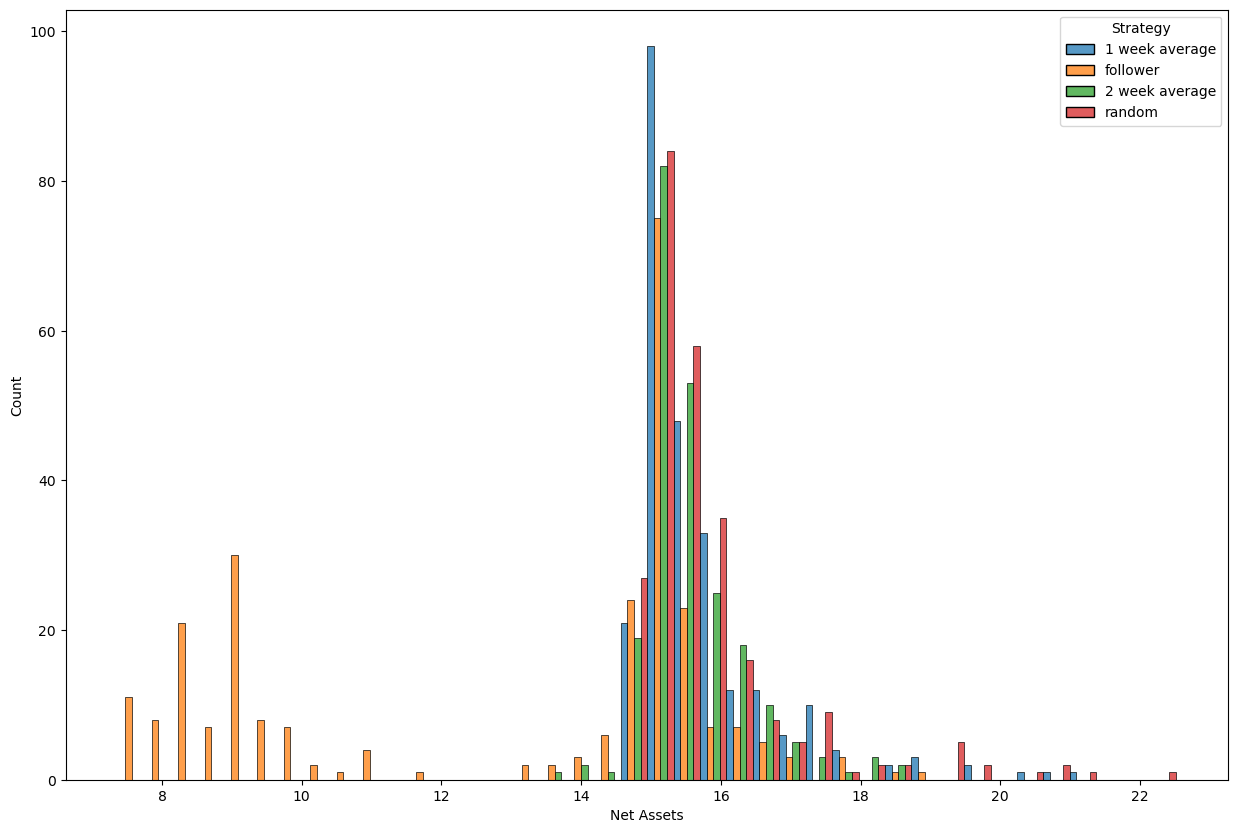

In [21]:
fit = False

def Maxwell_Boltzmann_2D(v,v_offset = 0, alpha = 1, k = 1, l = 1):
    return k*2*alpha*(v-v_offset)*np.exp(-alpha*l*(v-v_offset)**2)

plt.rcParams["figure.figsize"] = (15,10)

agent_data = sim.datacollector.get_agent_vars_dataframe()
print(agent_data.tail())
final_agent_data = agent_data.xs(simulation_length-1, level="Step")
strategies = agent_data.xs(simulation_length-1, level="Step")["Strategy"]
final_velocities = final_agent_data['Net Assets']
# plt.hist(final_velocities,bins = 40, density = True, stacked = True)
sns.histplot(data=final_agent_data, x="Net Assets", hue="Strategy", bins=40, multiple = "dodge")

# bin_heights, bin_edges, _ = plt.hist(final_velocities,bins = 40, density = True, stacked = True, multiple = "dodge")

if fit is True:
    bin_centres = bin_edges[:-1] + np.diff(bin_edges)/2
    plt.plot(bin_centres,bin_heights)
    opt_params, pcov = curve_fit(Maxwell_Boltzmann_2D, bin_centres, bin_heights, p0=[1, 1, 1], bounds = (0,50))
    perr = perr = np.sqrt(np.diag(pcov))
    x_interval_for_fit = np.linspace(bin_edges[0], bin_edges[-1], 10000)
    fit_y = Maxwell_Boltzmann_2D(x_interval_for_fit, *opt_params)
    plt.plot(x_interval_for_fit, fit_y, label = 'f')

# plt.savefig('Net_Assets_1000_Agent_100_Step_Simulation.png', dpi=300)


## Detailed Collision Testing

## Comparing Simulation Collision with standard collision

In [31]:
sim = Simulation(no_traders = 2, Test = True)
# sim.collision_test() # Tells us the velocities and movement angles before the collision
contact_angle = 45
movement_angle1 = 45
velocity1 = [1,-1] #rotation_of_axes([1,0],math.degrees(movement_angle1))
velocity2 = [-1,1]


simvelo = np.array(sim.collision_test(manual=False,velocity1=velocity1, velocity2=velocity2, contact_angle=contact_angle))
velocities = sim.datacollector.get_model_vars_dataframe()
print(velocities)
manvelo =np.array(collision_full(velocity1=velocity1, velocity2=velocity2, contact_angle=contact_angle,mass1 = 1,mass2= 1))
print(simvelo)
print(manvelo)
print(simvelo - manvelo)
# Getting issues because of data collection
    # Here we are simply printing output velocity, without taking into account the randomisation of the scheduler
        # The randomised scheduler means that the agent being interacted with is different.

Collision between agent 0 and agent 1
velocity1 in collision [1, -1], velocity 2 in collision [-1, 1]
Collision angle 45
Final Velocities of particles in original axes, velocity1: [0.9999999999999997, -1.0], velocity2: [-0.9999999999999997, 1.0]

[0.9999999999999997, -1.0] [-0.9999999999999997, 1.0]
Velocities after: [[0.9999999999999997, -1.0], [-0.9999999999999997, 1.0]]
Empty DataFrame
Columns: []
Index: []
[[ 1. -1.]
 [-1.  1.]]
[[ 1. -1.]
 [-1.  1.]]
[[0. 0.]
 [0. 0.]]


## Collision Test Wrapper
Carries out collisions at different contact angles for specified initial velocities of 2 particles then plots resulting outgoing velocities

In [ ]:
contact_angles = np.linspace(-180,180,360)
velocity1 = [1,1]
velocity2 = [-1,-1]
final_velocities = []

for angle in contact_angles:
    sim = Simulation(no_traders =2, Test = True)
    final_velocities.append(sim.collision_test(manual=False,velocity1=velocity1, velocity2=velocity2, contact_angle=angle))

array = np.array(final_velocities)
print(f'Incidence velocities: Agent 0 {velocity1}, and Agent 1 {velocity2}')
plt.plot(contact_angles,array[:,0,0], label="Agent 0, x velocity")
plt.plot(contact_angles,array[:,0,1], label="Agent 0, y velocity")
plt.plot(contact_angles,array[:,1,0], label="Agent 1, x velocity")
plt.plot(contact_angles,array[:,1,1], label="Agent 0, y velocity")
plt.legend()
plt.ylabel(f'Velocity')
plt.xlabel(f'Contact Angle ($\degree$)')
plt.title(f'Collision Test Wrapper Function: Velocity v Contact Angle ($\degree$)')

## Varying velocity of particle 1
Specified collision angle and particle 2 velocity, whilst varying particle 1 velocity vector direction

[-1.0, 1.2246467991473532e-16] @ -180.0
Collision between agent 0 and agent 1
velocity1 in collision [-1.0, 1.2246467991473532e-16], velocity 2 in collision [-1, 1]
Collision angle 45
Final Velocities of particles in original axes, velocity1: [-0.5000000000000001, 0.5], velocity2: [-1.4999999999999998, 0.5000000000000001]

[-0.5000000000000001, 0.5] [-1.4999999999999998, 0.5000000000000001]
Velocities after: [[-0.5000000000000001, 0.5], [-1.4999999999999998, 0.5000000000000001]]
Collision between agent 0 and agent 1
velocity1 in collision [-1.0, 1.2246467991473532e-16], velocity 2 in collision [-1, 1]
Collision angle 45
Final Velocities of particles in original axes, velocity1: [-0.5000000000000001, 0.5], velocity2: [-1.4999999999999998, 0.5000000000000001]

[-0.5000000000000001, 0.5] [-1.4999999999999998, 0.5000000000000001]
Velocities after: [[-0.5000000000000001, 0.5], [-1.4999999999999998, 0.5000000000000001]]
final_velocities [[-0.5000000000000001, 0.5], [-1.4999999999999998, 0.50

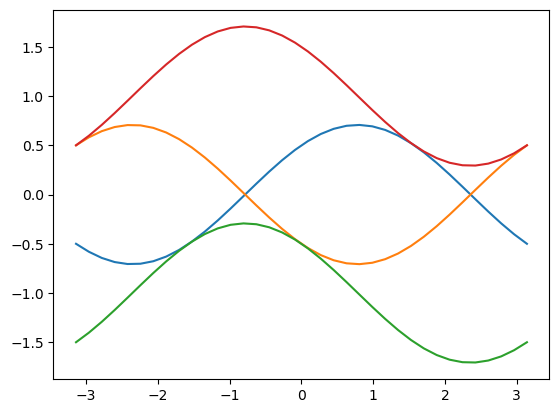

In [26]:
contact_angle = 45
# velocity1s = rotation_of_axes([1,0],np.linspace(-np.pi/2,np.pi/5,3))
movement_angle1 = np.linspace(-np.pi,np.pi,36)
velocity1array = []
velocity2 = [-1,1]
final_velocities_array = []

for movement_angle in movement_angle1:
    velocity1 = rotation_of_axes([1,0],movement_angle)
    velocity1array.append(velocity1)
    print(f'{velocity1} @ {math.degrees(movement_angle)}')
    sim = Simulation(no_traders =2, Test = True)
    final_velocities_array.append(sim.collision_test(manual=False,velocity1=velocity1, velocity2=velocity2, contact_angle=contact_angle))
    print(f'final_velocities {sim.collision_test(manual=False,velocity1=velocity1, velocity2=velocity2, contact_angle=contact_angle)}')

array = np.array(final_velocities_array)
print(f'{final_velocities_array}')
print(f'Incidence velocities: Agent 0 {velocity1array}, and Agent 1 {velocity2}')
plt.plot(movement_angle1,array[:,0,0], label="Agent 0, x velocity")
plt.plot(movement_angle1,array[:,0,1], label="Agent 0, y velocity")
plt.plot(movement_angle1,array[:,1,0], label="Agent 1, x velocity")
plt.plot(movement_angle1,array[:,1,1], label="Agent 0, y velocity")
# plt.legend()
# plt.ylabel(f'Velocity')
# plt.xlabel(f'Contact Angle ($\degree$)')
# plt.title(f'Collision Test Wrapper Function: Velocity v Contact Angle ($\degree$)')

## Testing External Collison Function

In [119]:
contact_angles = np.linspace(-180,180,360)
velocity1 = [1,0]
velocity2 = [-1,0]
final_velocities = []

# sim = Simulation(no_traders =2, Test = True)
# final_velocities.append(sim.collision_test(manual=False,velocity1=velocity1, velocity2=velocity2, contact_angle=90))

for angle in contact_angles:
    final_velocities.append(collision_full(velocity1=velocity1, velocity2=velocity2, contact_angle=angle,mass1 = 1,mass2= 1))

[1. 0.]


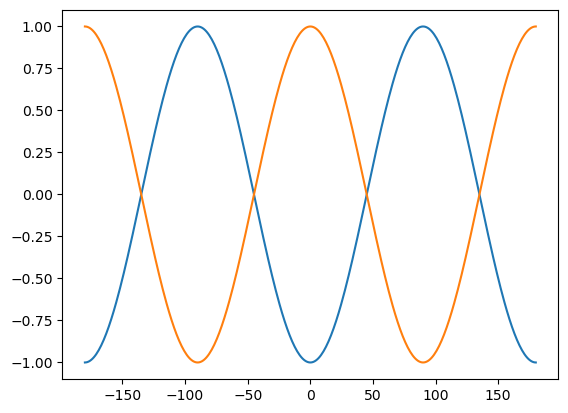

In [120]:
array2 = np.array(final_velocities)
print(array[1,0,:])
plt.plot(contact_angles,array2[:,:,0])
# plt.plot(contact_angles,array[:,:,1])

## Standard Simulation Run

In [8]:
sim = Simulation(mean_collision_probability = 0.5, starting_velocity = 1,trader_mass = 1, no_traders = 100, Dimensions = 2, Test = False)
sim.run(simulation_length = 10)

velocities = sim.datacollector.get_agent_vars_dataframe()
print(velocities.tail())

  0%|          | 0/10 [00:00<?, ?it/s]

              Velocity
Step AgentID          
9    995      1.850281
     996      1.017278
     997      0.329185
     998      0.241541
     999      0.450997


## Plotting and fitting velocity distribution

               Velocity        Strategy
Step AgentID                           
99   95       15.434261          random
     96       15.357639  2 week average
     97       16.438837  2 week average
     98       14.646589  1 week average
     99       15.579462  2 week average


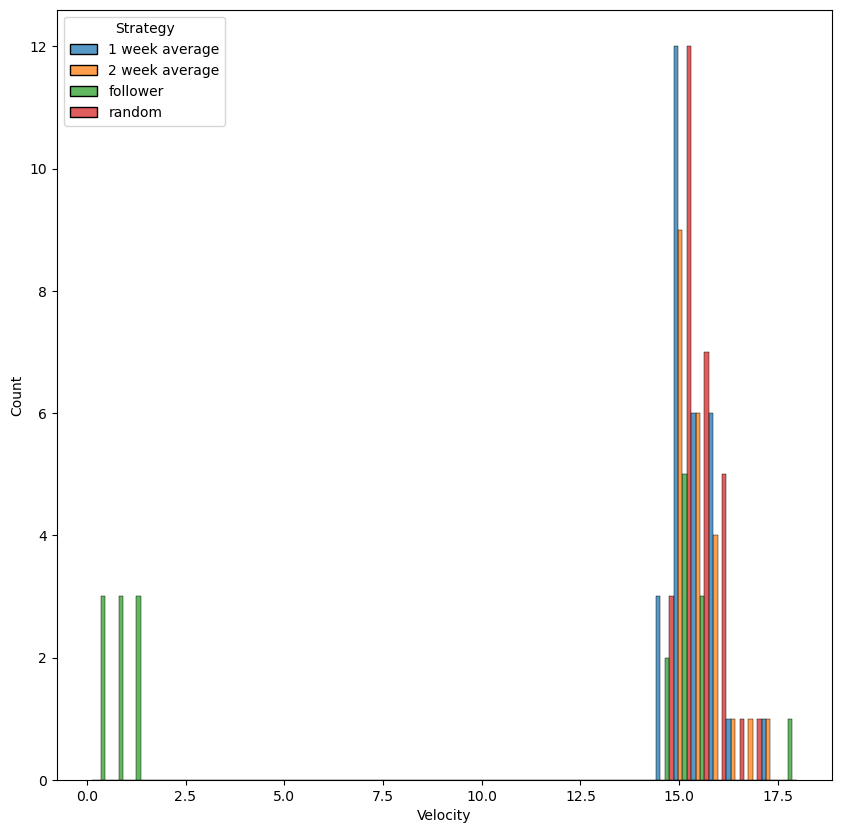

In [18]:
fit = False

def Maxwell_Boltzmann_2D(v,v_offset = 0, alpha = 1, k = 1, l = 1):
    return k*2*alpha*(v-v_offset)*np.exp(-alpha*l*(v-v_offset)**2)

# contact_angles = np.linspace(-180,180,360)
# velocity1 = [1,0]
# velocity2 = [-1,0]
# final_velocities = []

# sim = Simulation(no_traders =2, Test = True)
# final_velocities.append(sim.collision_test(manual=False,velocity1=velocity1, velocity2=velocity2, contact_angle=90))

# for angle in contact_angles:
#     sim = Simulation(no_traders =2, Test = False)
#     final_velocities.append(sim.collision_test(manual=False,velocity1=velocity1, velocity2=velocity2, contact_angle=angle))
plt.rcParams["figure.figsize"] = (10,10)

agent_data = sim.datacollector.get_agent_vars_dataframe()
print(agent_data.tail())
final_agent_data = agent_data.xs(simulation_length-1, level="Step")
strategies = agent_data.xs(simulation_length-1, level="Step")["Strategy"]
final_velocities = final_agent_data['Velocity']
# plt.hist(final_velocities,bins = 40, density = True, stacked = True)
sns.histplot(data=final_agent_data, x="Velocity", hue="Strategy", bins=40, multiple = "dodge")

# bin_heights, bin_edges, _ = plt.hist(final_velocities,bins = 40, density = True, stacked = True, multiple = "dodge")

if fit is True:
    bin_centres = bin_edges[:-1] + np.diff(bin_edges)/2
    plt.plot(bin_centres,bin_heights)
    opt_params, pcov = curve_fit(Maxwell_Boltzmann_2D, bin_centres, bin_heights, p0=[1, 1, 1], bounds = (0,50))
    perr = perr = np.sqrt(np.diag(pcov))
    x_interval_for_fit = np.linspace(bin_edges[0], bin_edges[-1], 10000)
    fit_y = Maxwell_Boltzmann_2D(x_interval_for_fit, *opt_params)
    plt.plot(x_interval_for_fit, fit_y, label = 'f')

# Real Space 2D Particles in a box

Will use the mesa.continuous_space function

In [417]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self._velocity = rotation_of_axes(np.full(2,self.model.starting_velocity, dtype=float),self.random.uniform(0,2*np.pi))
        self.radius = self.model.radius
        self.mass = 1
        # print(self._velocity)
    
    @property
    def velocity(self):
        return self._velocity
    
    @velocity.setter
    def velocity(self, value):
        self._velocity = value
    
    @property
    def velocity_magnitude(self):
        return np.linalg.norm(self._velocity)
    
    def move(self):
        
        # print(f'Position {self.pos} + velocity {self._velocity} * time step {self.model.time_step}')
        
        new_position = self.pos + np.array(self._velocity)*self.model.time_step
        # new_position = [sum(x) for x in zip([self.pos],self._velocity*self.model.time_step)]
        
        # print(f'New position {new_position}')

        self.model.space.move_agent(self, new_position)
        
    def collision_check(self):
        # This collision checking will define the dynamics of the collision
        # potential_collision_partners = self.model.space.get_neighbors(self.pos, radius = 200, include_center = False)
        potential_collision_partners = self.model.space.get_neighbors(self.pos, radius = self.radius, include_center = False)
        
        if potential_collision_partners:
            # print(f'agent {self.unique_id} is colliding with {[z.unique_id for z in potential_collision_partners]}')

            for other in potential_collision_partners:
                
                if self == other: 
                    # print(f'no collision')
                    continue
                # print(f'Collision between {self.unique_id} and {potential_collision_partners[0].unique_id}')
                # print(f'agent {self.unique_id} is colliding with {other.unique_id}')

                self.collision(other)
                


    def collision(self,other):
        # print(f'Colliding {self.unique_id} and {other.unique_id}')
        
        # converting from tuple to numpy array
        position1 = np.array(self.pos)
        position2 = np.array(other.pos)
        contact_angle = np.arctan2(position2[1] - position1[1], position2[0] - position1[0])
        velocity1, velocity2 = collision_full(self._velocity,other._velocity,contact_angle, self.mass, other.mass)
        self._velocity = tuple(velocity1)
        other._velocity = tuple(velocity2)
        
        
    def step(self):
        self.collision_check()
        self.move()
        
    def draw(self, ax):
        """Add this Particle's Circle patch to the Matplotlib Axes ax."""

        circle = Circle(xy=self.pos, radius=self.radius)
        ax.add_patch(circle)
    
    def overlap(self):
        potential_collision_partners = self.model.space.get_neighbors(self.pos, radius = self.radius, include_center = False)
        
        if potential_collision_partners:
            # print(f'overlap found at {self.pos}')
            return True
        else:
            return False

        

class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, N, width, height, time_step, radius, starting_velocity):
        self.num_agents = N
        self.space = mesa.space.ContinuousSpace(x_max = 0.5*width, y_max = 0.5*height, torus = True, x_min = -0.5*width, y_min = -0.5*height)
        self.schedule = mesa.time.RandomActivation(self)
        self.time_step = time_step
        self.radius = radius
        self.starting_velocity = starting_velocity
        
                         

        # Create agents
        for i in range(self.num_agents):

            a = MoneyAgent(i, self)

            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.uniform(self.space.x_min, self.space.x_max)
            y = self.random.uniform(self.space.x_min, self.space.x_max)

            self.space.place_agent(a, (x, y))

            j = 0
            while a.overlap():
                # print(f'{a.unique_id} has an overlap')

                self.schedule.remove(a)
                self.space.remove_agent(a)
                # print(f'Removing {a}')

                if j > 100:
                    print(f'Couldn\'t find any space for more agents. Reached max number of overlaps')

                    break

                a = MoneyAgent(i, self)
                self.schedule.add(a)

                # Add the agent to a random grid cell
                x = self.random.uniform(self.space.x_min, self.space.x_max)
                y = self.random.uniform(self.space.x_min, self.space.x_max)

                self.space.place_agent(a, (x, y))

                j += 1

            else:
                continue

            break
        print(f'Total number of agents in model: {len(self.schedule.agents)}')

        
        self.datacollector = mesa.DataCollector(
            model_reporters=None, agent_reporters={"Speed": "velocity_magnitude", "Position": "pos"}
        )
            
    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()
        
    def plot_2D(self):
        fig, ax = plt.subplots()
        plt.rcParams["figure.figsize"] = (5,5)
        ax.set_xlim(self.space.x_min, self.space.x_max)
        ax.set_ylim(self.space.y_min, self.space.y_max)
        
        for agent in self.schedule.agents:
            agent.draw(ax)
            
    def collision_test(self,manual = True, velocity1 = [1,1], velocity2 = [1,1], position1 = [0,0], position2 = [0,0]):
        assert len(self.schedule.agents) == 2, 'Can only test collisions for 2 particles'

        agent_velocities = []
        pos = [[0,0],[0,0]]
        agents = self.schedule.agents

        if manual:
            
            for i, agent in enumerate(self.schedule.agents):
                
                agent_velocities.append(agent._velocity)
                for index, dimension in enumerate(['x','y']):
                    agent._velocity[index] = float(input(f'What {dimension} velocity would you like agent {agent.unique_id} to have?'))
                    
                for index, dimension in enumerate(['x','y']):
                    pos[i][index]= float(input(f'What {dimension} position would you like agent {agent.unique_id} to have?'))
                    
            agents[0].pos = tuple(pos[0])
            agents[1].pos = tuple(pos[1])
       
        else:
            agents[0]._velocity = velocity1
            agents[1]._velocity = velocity2
            agents[0].pos = tuple(position1)
            agents[1].pos = tuple(position2)

        self.datacollector.collect(self)

#         self.schedule.step()
#         # agents[0].step()
        
#         self.datacollector.collect(self)




## Single Collision Testing
Run the below to setup up the starting conditions

Total number of agents in model: 2


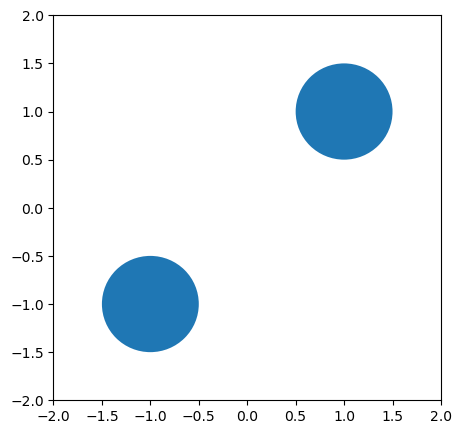

In [390]:
model = MoneyModel(N = 2, width = 4,height = 4, time_step = 0.1, radius = 0.5, starting_velocity = 0.1)
model.collision_test(manual =False, velocity1 = [1,1], velocity2 = [-1,-1], position1 = [-1,-1], position2 = [1,1])
model.plot_2D()

Then step through the simulation using the below code.

Note that when we collide two objects, the spheres overlap. Not sure if this is an artifact of the graphics or the get_neighbours function. 

Still need to make sure that the correct collision geometry is correct (It's not)

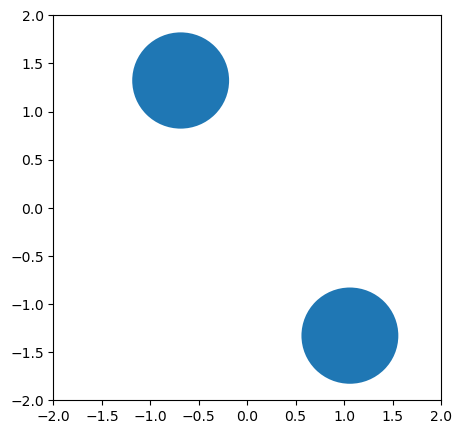

In [411]:
# for i in range(10):
model.step()
model.plot_2D()

In [418]:
model = MoneyModel(N = 1000, width = 100,height = 100, time_step = 0.1, radius = 2, starting_velocity = 0.1)
model_length = 100
for i in tqdm(range(model_length)):
    # print(f'step {i}')
    model.step()
# model.plot_2D()
# model.step()
# model.plot_2D()
print(len(model.schedule.agents))

Total number of agents in model: 1000


  0%|          | 0/100 [00:00<?, ?it/s]

1000


agent 1 is colliding with [0]
<bound method MoneyAgent.overlap of <__main__.MoneyAgent object at 0x7fbfbc37f3d0>>
agent 0 is colliding with [1]
<bound method MoneyAgent.overlap of <__main__.MoneyAgent object at 0x7fbfbc37d180>>


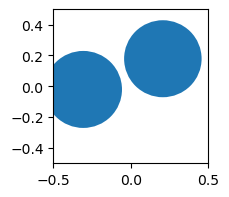

In [211]:
model.step()
model.plot_2D()

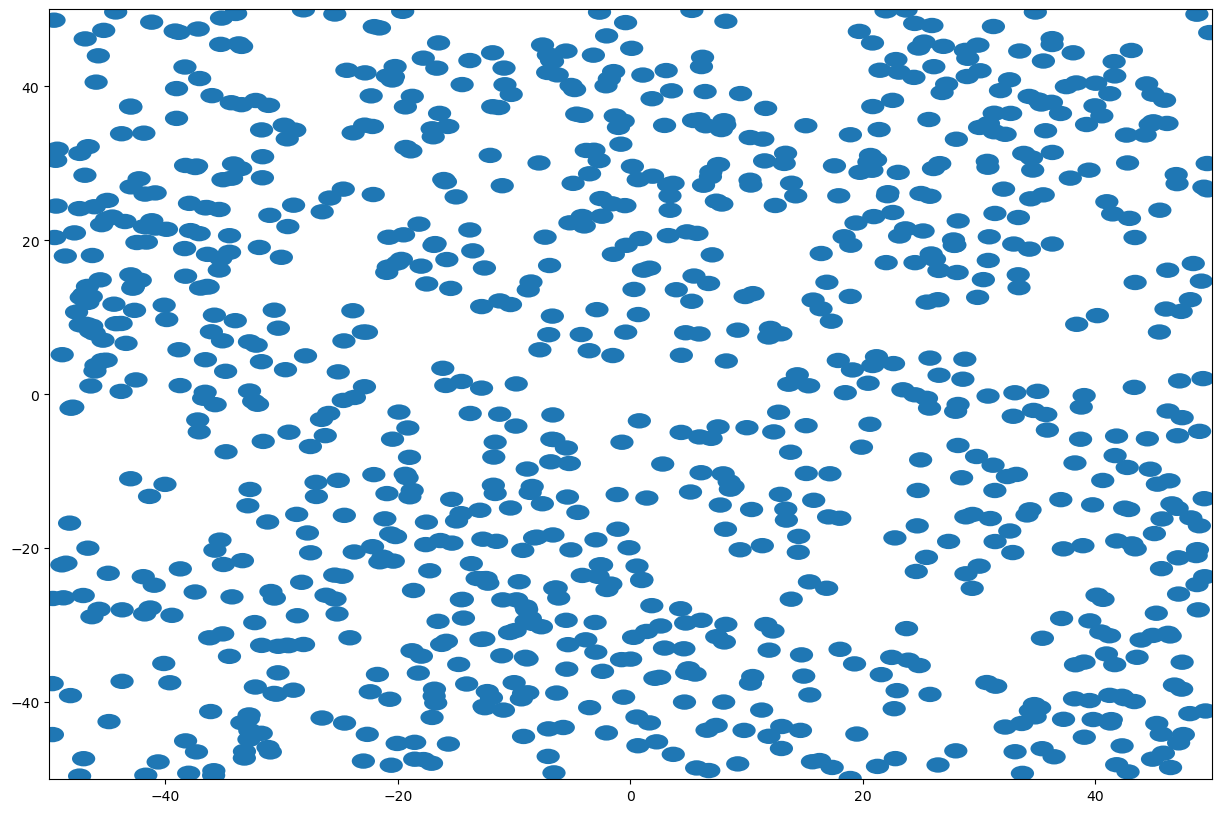

In [26]:
positions = model.datacollector.get_agent_vars_dataframe()
# print(positions.loc["Step", :])
# print(positions.tail())
momentary_position = positions.xs(9, level="Step")["Position"]
# print(len(momentary_position))


fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,10)
ax.set_xlim(model.space.x_min, model.space.x_max)
ax.set_ylim(model.space.y_min, model.space.y_max)

for agent_position in momentary_position:
    circle = Circle(xy=agent_position, radius=1)
    ax.add_patch(circle)
#     for agent in model.schedule.agents:
#         agent.draw(ax)

# model.plot_2D()

# for agent_position in momentary_position:
#     circle = Circle(xy=agent_position, radius=1)
#     ax.add_patch(circle)
# def animate_plot(Step=model_length-1):
#     print(Step)
#     momentary_position = positions.xs(Step, level="Step")["Position"]
#     model.plot_2D()
    
# slider = widgets.IntSlider(min= 0, max=model_length-1)
# play = widgets.Play(min= 0, max=model_length-1)
# widgets.jslink((play, 'value'), (slider, 'value'))
# widgets.interact(animate_plot, Step = slider)
# widgets.HBox([play, slider])

                 Speed                                   Position
Step AgentID                                                     
99   995      0.141421   [35.10166802499392, -24.894672227756804]
     996      0.141421     [9.108132961768698, -7.78898349349952]
     997      0.141423   [25.125003095263608, -41.61484568530928]
     998      0.146129  [-31.935033117423394, 5.7503723232441635]
     999      0.141421   [-7.557460375002058, -9.406688045992116]


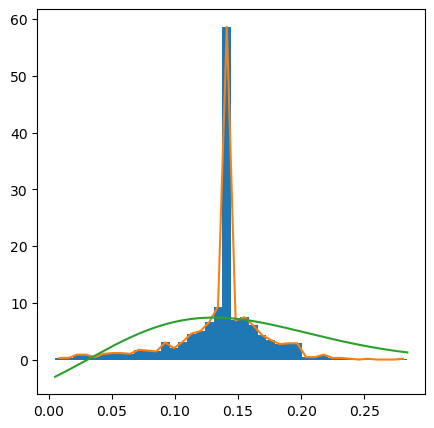

In [419]:
def Maxwell_Boltzmann_2D(v,v_offset = 0, alpha = 0.2, k = 1, l = 1):
    return k*2*alpha*(v-v_offset)*np.exp(-alpha*l*(v-v_offset)**2)

velocities = model.datacollector.get_agent_vars_dataframe()
print(velocities.tail())
final_velocities = velocities.xs(model_length - 1, level="Step")["Speed"]
bin_heights, bin_edges, _ = plt.hist(final_velocities,bins = 40, density = True, stacked = True)
bin_centres = bin_edges[:-1] + np.diff(bin_edges)/2
plt.plot(bin_centres,bin_heights)
opt_params, pcov = curve_fit(Maxwell_Boltzmann_2D, bin_centres, bin_heights, p0=[0, 0.0025, 1], bounds = (0,50))
perr = perr = np.sqrt(np.diag(pcov))
x_interval_for_fit = np.linspace(bin_edges[0], bin_edges[-1], 10000)
fit_y = Maxwell_Boltzmann_2D(x_interval_for_fit, *opt_params)
plt.plot(x_interval_for_fit, fit_y, label = 'f')